# BioPython & SQL
## Shane Crinion 
------

Its possible to use MySQL Workbench to 'dump' a database in SQL format, and then use this to reproduce an ER diagram. An alternative is to use SQLFairy, a a group of Perl modules that manipulate structured data definitions (mostly database schemas) in interesting ways to quote the package's website (http://sqlfairy.sourceforge.net/). For example in this blogpost (https://nsaunders.wordpress.com/2009/01/11/easy-visualisation-of-database-schemas-using-sqlfairy/), we can see how easy it is to use the mysqldump command to create a SQL data object, and then use the program sqlt-graph to generate a ER plot of the database schema.

---

To generate the entity-relationship diagram, I install SQFairy using:

 ><code> sudo apt-get install sqlfairy </code>

The data from the bank database is then dumped to a .sql file and made into a .png image file:

><code>mysqldump -u shane -p -d bank > mydatabase.sql
sqlt-graph -f MySQL -o mydatabase.png -t png mydatabase.sql</code>

---


## Entity-Relationship Diagram

An entity relationship diagram is a flowchart that illustrates how entities relate to each other. They are used to create databases within to interpret the relationship, connections and attributes between entities.


###### ER for Bank database

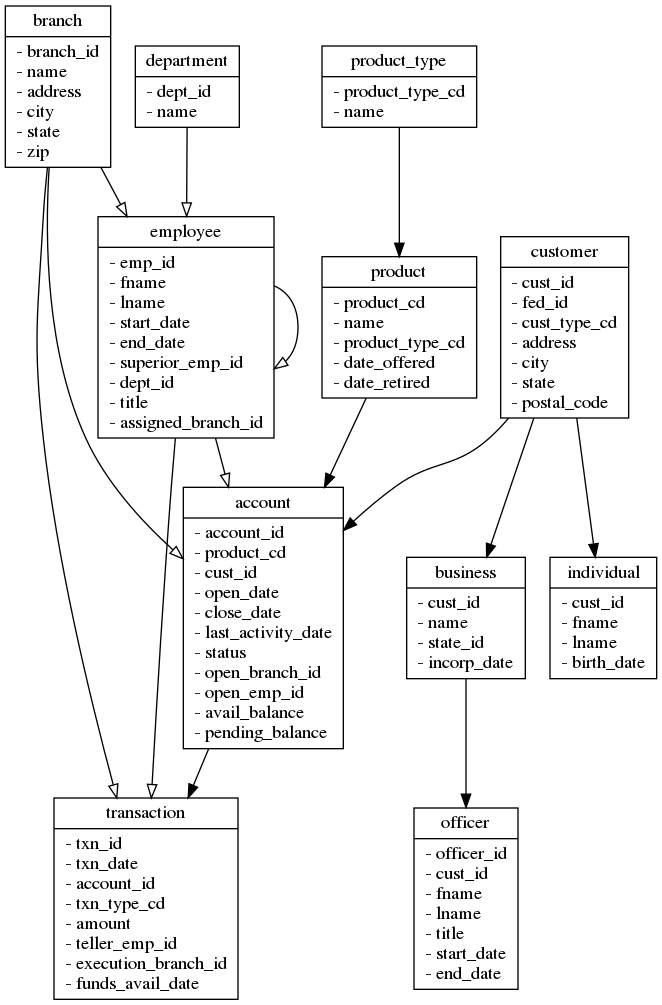

In [3]:
from IPython.display import Image
Image (filename='/home/shane/Documents/mydatabase.png')

>**Interpretation:** The information for above indicates the relationship between each entity of the bank (rectangle). The arrows represent an association between two entities. The solid line such as business -> officer is an assocation relationship. This indicates that 'officer' knows about 'business' as it recieves an argument to generate an output.A human example of this is that every instance of a parent is an instance of their children. 
In the case of the unfilled arrows, the instance of the entity is not dependent on the instance of the parent entity. 
The unfilled arrow pointing back to itself on entity 'employee' may indicate that an argument from the entity can be used contribute to the entity instance but is not arbitrary. 


SQL & Remote Databases 
------
Some cancer patients treated with chemotherapy go on to develop drug resistant disease that is refractory to the original treatment. Genomic profiling of these patients show distinct patterns of copy number variants (duplications) and deletions of specific regions of the cancer genome, which are a result of the tumour populations evolving in response to the treatment regimen. Often the most important proteins involved in this process are the glycoproteins that pump xenobiotics (foreign substances) out of cells - their amplification enhances tumour cells' abilities to remove cytotoxic drugs, and so, counter the effects of treatment. A quite common amplification occurs in chromosome 7, specifically within the 7q21-q22 locus. You've been asked to 
and (ii) generate a set of gene descriptions for each gene. Figure out a way to search this set of gene descriptions for keywords that are consistent with 'glycoprotein', 'pump', 'xeno' or 'resistance' and from this, identify the likely set of genes involved in the development of chemoresistance.

---

**1.** Identify the genes associated with the amplified locus chr7:77900000-107800000:

*Use the command line <code>mysql</code> program to implement a <code>SQL</code> query against the <code>hg38</code> build of the human genome to find the list of genes within this locus - redirect this output to a file, <code>genes_list.txt</code>*

The <code>7q21-q22</code> susceptible to copy number variants and deletions is specified to extract the correct data from the UCSC Genome Browser:
><code>chrom="chr7"
chromStart="77900000"
chromEnd="107800000"
</code>

The remote UCSC MySQL server is the accessed using the following code which write the information so the desired region to the genlist.txt file:
><code>mysql -h genome-mysql.soe.ucsc.edu -ugenome -A -e "select e.chrom, e.txStart, e.txEnd, e.strand, e.name, j.name as geneSymbol from ncbiRefSeqCurated e, ncbiRefSeqLink j where e.name = j.id AND e.chrom='${chrom}' AND ((e.txStart >= ${chromStart} AND e.txStart <= ${chromEnd}) OR (e.txEnd >= ${chromStart} AND e.txEnd <= ${chromEnd})) order by e.txEnd desc " hg38 > genlist.txt
</code>

**2.** Generate a set of gene descriptions for each gene.

*Perform a similar search to generate a set of gene descriptions using the same search constraints - redirect this output to a file, <code>gene_descriptions.txt*</code>

To extract the descriptions for the genes in the interest region, the <code>description</code> field is added to the code that interacts with the UCSC Genome Browser. Write this to another text file, which can then be used in a Python code.

><code>mysql -h genome-mysql.soe.ucsc.edu -ugenome -A -e "select e.chrom, e.txStart, e.txEnd, e.strand, e.name, j.name, description as geneSymbol from ncbiRefSeqCurated e, ncbiRefSeqLink j where e.name = j.id AND e.chrom='${chrom}' AND ((e.txStart >= ${chromStart} AND e.txStart <= ${chromEnd}) OR (e.txEnd >= ${chromStart} AND e.txEnd <= ${chromEnd})) order by e.txEnd desc " hg38 > desclist.txt
</code>


*Using the keywords above, search through the file gene_descriptions.txt to identify some - if any - that have one or more of those keywords in their gene descriptions.*

To do this, I will import <code>pandas</code>, <code>os</code> and <code>regular expressions</code>. <code>Pandas</code> is used to create a data frame to interact with gene descriptions. <code>os</code> is for reader's operator system to interact and inspect the data frame. Regular expressions <code>re</code> is used to compile the genes described by key words associated with glycoprotein pumping.

In [1]:
import pandas 
import os
import re

The <code>.txt</code> generated earlier from the UCSC MySQL server is used in Python by reading in with <code>panda</code>. Regular expression finds all cases of each term in the for loops generated below. A for loop is created for each term 

In [5]:
Desc = pandas.read_csv("desclist.txt", sep="\t")
Desc


,chrom,txStart,txEnd,strand,name,name.1,geneSymbol
0,chr7,107765466,107803233,-,NM_000111.2,SLC26A3,The protein encoded by this gene is a transmem...
1,chr7,107743696,107761667,+,NR_024199.2,CBLL1,This gene encodes an E3 ubiquitin-ligase for t...
2,chr7,107743696,107761667,+,NM_024814.3,CBLL1,This gene encodes an E3 ubiquitin-ligase for t...
3,chr7,107743696,107761667,+,NM_001284291.1,CBLL1,This gene encodes an E3 ubiquitin-ligase for t...
4,chr7,107660634,107717809,+,NM_000441.1,SLC26A4,Mutations in this gene are associated with Pen...
5,chr7,107656515,107661798,-,NR_028137.1,SLC26A4-AS1,NaN
6,chr7,107579976,107623317,+,NM_018844.3,BCAP29,NaN
7,chr7,107580758,107623317,+,NM_001008405.2,BCAP29,NaN
8,chr7,107579976,107623317,+,NR_027830.1,BCAP29,NaN
9,chr7,107563956,107578523,+,NR_073005.1,DUS4L,NaN


In [6]:

regex = re.compile(r'glycoprotein')
for row in Desc.iterrows():
    if(re.search(regex,str(row[1][6]))):
        print(row[1][5], "has 'glycoprotein' in the definition.")

SLC26A3 has 'glycoprotein' in the definition.
MUC12 has 'glycoprotein' in the definition.
MUC3A has 'glycoprotein' in the definition.
PCOLCE has 'glycoprotein' in the definition.
GAL3ST4 has 'glycoprotein' in the definition.
SGCE has 'glycoprotein' in the definition.
SGCE has 'glycoprotein' in the definition.
SGCE has 'glycoprotein' in the definition.
SGCE has 'glycoprotein' in the definition.
ERVW-1 has 'glycoprotein' in the definition.
ERVW-1 has 'glycoprotein' in the definition.
ABCB4 has 'glycoprotein' in the definition.
ABCB4 has 'glycoprotein' in the definition.
ABCB4 has 'glycoprotein' in the definition.
CD36 has 'glycoprotein' in the definition.
CD36 has 'glycoprotein' in the definition.
CD36 has 'glycoprotein' in the definition.
CD36 has 'glycoprotein' in the definition.
CD36 has 'glycoprotein' in the definition.
CD36 has 'glycoprotein' in the definition.
CD36 has 'glycoprotein' in the definition.
CD36 has 'glycoprotein' in the definition.
CD36 has 'glycoprotein' in the defini

In [67]:
regex = re.compile(r'pump')
for row in Desc.iterrows():
    if(re.search(regex,str(row[1][6]))):
        print(row[1][5], "has 'pump' in the definition")

ABCB1 has 'pump' in the definition


In [69]:
regex = re.compile(r'xeno')
for row in Desc.iterrows():
    if(re.search(regex,str(row[1][6]))):
        print(row[1][5], "has 'xeno' in the defintion.")

ABCB1 has 'xeno' in the defintion.


In [73]:
Desc = pandas.read_csv("desclist.txt", sep="\t")
regex = re.compile(r'resistance')
for row in Desc.iterrows():
    if(re.search(regex,str(row[1][6]))):
        print(row[1][5], "has 'resistance' in the definition.")

ABCB1 has 'resistance' in the definition.
ABCB4 has 'resistance' in the definition.
ABCB4 has 'resistance' in the definition.
ABCB4 has 'resistance' in the definition.


>As previously mentioned, chemoresistance can develop due to the proteins associated with glycoprotein pumping as they can remove cytotoxic treatment drugs when amplified. For this reason, we inspected genes that contain the words "glycoprotein", "pump", "xeno" and "resistance" in the gene description. The results indicated that <code>ABCB1</code> contains 3 keywords ("pump","xeno","resistance") and did not contain 1 keyword ("glycoprotein"). To inspect this further, we can access the full description of the <code>ABCB1</code> gene using regular expression:

In [83]:
Desc = pandas.read_csv("desclist.txt", sep="\t")
regex = re.compile(r'ABCB1')
for row in Desc.iterrows():
    if(re.search(regex,str(row[1][5]))):
        print(row[1][6])

The membrane-associated protein encoded by this gene is a member of the superfamily of ATP-binding cassette (ABC) transporters. ABC proteins transport various molecules across extra- and intra-cellular membranes. ABC genes are divided into seven distinct subfamilies (ABC1, MDR/TAP, MRP, ALD, OABP, GCN20, White). This protein is a member of the MDR/TAP subfamily. Members of the MDR/TAP subfamily are involved in multidrug resistance. The protein encoded by this gene is an ATP-dependent drug efflux pump for xenobiotic compounds with broad substrate specificity. It is responsible for decreased drug accumulation in multidrug-resistant cells and often mediates the development of resistance to anticancer drugs. This protein also functions as a transporter in the blood-brain barrier. Mutations in this gene are associated with colchicine resistance and Inflammatory bowel disease 13. Alternative splicing and the use of alternative promoters results in multiple transcript variants. [provided by R

*On the basis of this, hypothesis which gene(s) are likely involved in chemoresistance - use PubMed and other resources to substantiate your hypothesis.*

>**Conclusion:** The protein encoded by <code> ABCB1 </code> is part of the ATP-binding cassette (ABC) transporter superfamily and is part of the MDR/TAP subfamily. The MDR/TAP proteins transport molecules across cellular membranes and are recognised in multidrug resistance and antigen presentation. The gene is likely to contribute to chemoresistance due to its genomic location and previously recognised association. The RefSeq information also indicates that the alternative splicing of the gene results in products with unknown function however this information is dated 2008. 

>A recent publication in Life Sciences by Yi Yang et al. titled "Histone deacetylase 2 regulates the doxorubicin (Dox) resistance of hepatocarcinoma cells and transcription of ABCB1" indicated that the histone deacetylases (HDACs) have numerous roles in hepatocarcinoma (HCC) cells and unknown roles in drug sensitivity. The overexpression of HDAC2 increases cell viability and in turn makes HCC cells 
resistant to chemotherapy medication doxorubicin (Dox). 

>HDAC2 interacts with ABCB1 by directly binding and inducing its upregulation and subsequent HCC resistance to Dox treatment. The KO of HDAC2 causes coordinate downregulation of ABCB1 and increased Dox sensitivity. The study concludes that HDAC2 is a target protein in regulating ABCB1 and Dox sensitivity in HCC cells. 


---

## Word Cloud
------

*As a bonus challenge, can you construct a word cloud from the set of descriptions? You might find the this Python package useful (https://github.com/amueller/word_cloud) although there may be others...*

In [84]:
!pip install --user wordcloud

from os import path
from wordcloud import WordCloud

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


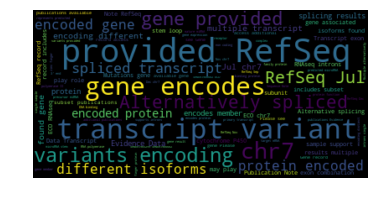

In [31]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(desclist.txt) if "desclist.txt" in locals() else os.getcwd()
# Read the whole text.
text = open(path.join(d, 'desclist.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()